In [1]:
#setup libraies
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [1]:
#setup libraies
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers
from tensorflow import keras 


In [2]:
#setup data 
data_dir = 'C:/Users/nooro/Deep learning MU/CNN_project/Data'

In [3]:
os.listdir(os.path.join(data_dir, 'happy'))
os.listdir(os.path.join(data_dir, 'sad'))

['03Negative-Art-superJumbo.jpg',
 '04BRODY-superJumbo.jpg',
 '1200px-ColdnessScale.svg.png',
 '1200px-Face_or_vase_ata_01.svg.png',
 '1533919.png',
 '16-tips-to-handle-negative-customer-reviews-online-5e65d24a36fb0-1280x720.png',
 '2020.097_BAM_How-to-oversome-a-negative-mindset_optimise-your-mental-health-at-work_940x485.jpg',
 '30349953_1532902583468.png',
 '8324-negative20pregnancy20test20results2002_1006x755.jpg',
 '8327-negative20or20false20negative20pregnancy20test2001_1006x755.jpg',
 '9780226202167.jpg',
 'Accepting20Negative20Emotions20-20kraked1596101006535.jpg',
 'AdobeStock_306908443_1760x_6ac91236-758e-4961-a3b0-2b74571db6a8_1760x.jpg',
 'AOLn63GD45jc63wIBYb6KQuSKpYVIGOon8HpgUfXAqG8s64-c-mo.jpg',
 'Benefits-of-Positive-Thinking-vs-Side-Effects-Infographics.png',
 'broad-negative-sentences.jpg',
 'Calculate-Percentage-Change-with-Negative-Numbers.png',
 'challenging-negative-thoughts.png',
 'Complaint-1030x687.jpg',
 'D8AAD8ADD988D98AD984-D8A7D984D8ACD985D984D8A9-D8A7D984D9

In [4]:
#for the sack of preprocessing tips we gonna go to the image folder and delete any image >10KB
image_ext = ['jpeg','jpg','bmp','png']

In [5]:
image_ext

['jpeg', 'jpg', 'bmp', 'png']

In [6]:
#LOOP THROUGH EVERY SINGL IMAGE in the data dir and remove them by using doggy image script
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            

In [7]:
tf.keras.utils.image_dataset_from_directory??
#getting your dataset ready ontherun (bunch of built in preprocessing)

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [9]:
 #load data
data = tf.keras.utils.image_dataset_from_directory(data_dir) #هنا بنينا داتا pipeline بالتوول الجاهزه بتاعت كيراس

Found 884 files belonging to 2 classes.


In [10]:
data # but we can't loop through it because it's generated for that we gnna use data iterator

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [12]:
batch = data_iterator.next() # this graping one batch of the data

In [13]:
print(len(batch)) #2 images and labels
print(batch[0].shape) #images represeted as numpy arrays
print(batch[1]) #good news = 0, bad news = 1

2
(32, 256, 256, 3)
[0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1]


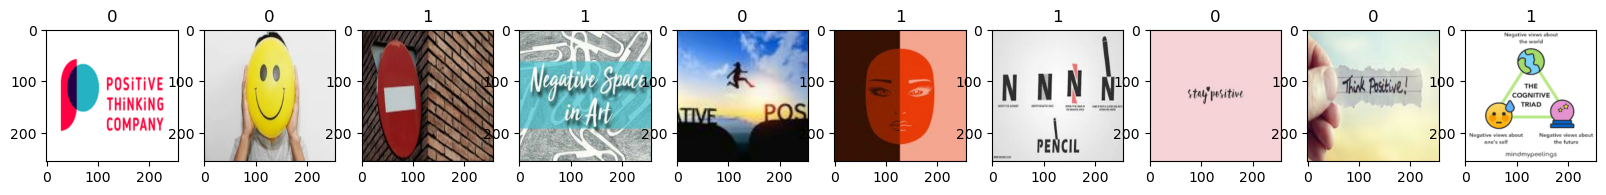

In [14]:
#for the sack of knowing which class is good news and which is bad
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
print(batch[0].max())
print(batch[0].min())

255.0
0.0


In [16]:
#Scale the data from 1 --> 0 
scaled = batch[0] / 255
print(scaled.max())
print(scaled.min())

1.0
0.0


In [17]:
def augment(image, label):
    #new_height = new_width = 32
    #image = tf.image.resize(image, (new_height,new_width))
    
    if tf.random.uniform((), minval=0,maxval=1) < 0.1:
        image = tf.tile(tf.image.rgb_to_grayscale(image), [1,1,1,3])
    
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.1, upper=0.2)
    
    image = tf.image.random_flip_left_right(image)#50%
    #image = tf.image.random_flip_up_down(image)#50%
    return image, label

In [22]:
#x = images y = labels || data.map allows us to perform the transformation in the pipeline
data = data.map(lambda x,y: (x/255, y))
data = data.map(augment,num_parallel_calls= tf.data.AUTOTUNE)

In [23]:
scaled_iterator = data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()[0].max()

In [25]:
#split data 
len(data)

28

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [27]:
train_size+val_size+test_size

27

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip(mode="horizontal"),
        layers.experimental.preprocessing.RandomContrast(factor=0.1),
    ]
)

#Deep model
model = keras.Sequential(
    [ 
        layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)), #16 filters 3*3 pixels moving 1pixil per move (relu) = anything less than zero we take it to zero and preserved to positive values
        data_augmentation,
        layers.MaxPooling2D(), # it's gonna take the max value after the relu ativation and return it back it will condens the output

        layers.Conv2D(32, (3,3), 1, activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(16, (3,3), 1, activation='relu'),
        layers.MaxPooling2D(),

        layers.Flatten(), #filters will be the last channel so we gonna condense the rows and width and number of output will be channel value, then we wanna condensed down to a singel value by Flatten it

        #output
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid') #singel output will be between 0 and 1 using sigmoid to classiefy
    ]
        )

In [26]:
MaxPooling2D??

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.MaxPool2D", "keras.layers.MaxPooling2D")
class MaxPooling2D(Pooling2D):
    """Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output,
    when using the `"valid"` padding option, has a spatial shape
    (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    For example, for `strides=(1, 1)` and `padding="valid"`:

    >>

In [29]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #16 filters 3*3 pixels moving 1pixil per move (relu) = anything less than zero we take it to zero and preserved to positive values
model.add(MaxPooling2D()) # it's gonna take the max value after the relu activation and return it back it will condens the output

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #filters will be the last channel so we gonna condense the rows and width and number of output will be channel value, then we wanna condensed down to a singel value by Flatten it

#output
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #singel output will be between 0 and 1 using sigmoid to classiefy

In [30]:
#tf.losses.BinaryCrossentropy for Binary classification problems
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [32]:
logdir = 'logs' # to save all the training outputs

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
 8/19 [===========>..................] - ETA: 12s - loss: 0.6947 - accuracy: 0.4883

In [ ]:
hist.history

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Evalute Performance Stage
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precsion:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

In [ ]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

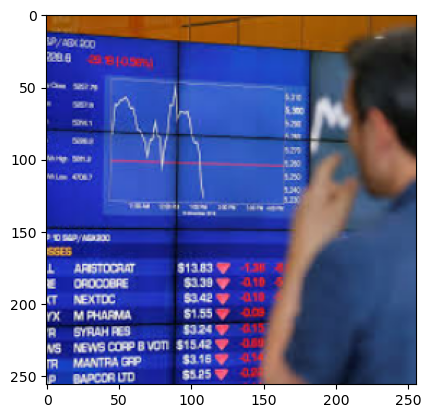

In [124]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

In [ ]:
#  احنا عملنا الخطوه دي عشان الموديل بتاعنا مستني مننا الداتا تدخله في صورة مجموعة صور مش صوره واحده عشان كده عملنا اكسباند الدايمنشنز وكده ده انكابسوليت للداتا في ليست او اراي جديده
np.expand_dims(resize, 0).shape

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0)) #وطبعاً هنا قسمنها على 255 عشان نعمل اسكال

In [ ]:
yhat

In [ ]:
if yhat > 0.5:
        print(f'Predicted class is Happy')
else:
        print(f'Predicted class is Sad')


In [ ]:
#Last step Saving the model 

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('CNN_project','CNN_ClassifiacationHappySad.h5')) 

In [ ]:
# if we need to reload the model 
new_model = load_model(os.path.join('CNN_project','CNN_ClassifiacationHappySad.h5')) 

In [ ]:
new_model

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhat_new > 0.5:
        print(f'Predicted class is Happy')
else:
        print(f'Predicted class is Sad')
